# A study on spontaneous decay rate of an atom in presence of a nanofiber using BEM approach

In these notes, I calculate the Local Density of States (LDOS), or the imaginary part of the on-site Green's function and hence the modified spontaneous emission rate of an atom in presence of a nanofiber using the Boundary Element Method (BEM). The BEM code is from Prof. Alejandro Manjavacas's group. 

This is an [IJulia notebook](https://github.com/JuliaLang/IJulia.jl), which provides a nice
browser-based [Jupyter](http://jupyter.org/) interface to the [Julia language](http://julialang.org/), a high-level dynamic language (similar to Matlab or Python+SciPy) for technical computing.  The notebook allows us to combine code and results in one place.

We are only manipulating the generated data from the simulation results in this notebook. As a brief recap of the simulation process, I have used a compiled BEM code by Alejandro's group written in C++ called `bem2D` on a cluster computing system. A configuration C++ code is defined in the files `nanofiber_dipolex_new.cpp`, `nanofiber_dipoley_new.cpp` and `nanofiber_dipolez_new.cpp` which are put in the same folder as `bem2D`. We fix the wavelength of the light as the `D_2` line or `852`nm. The only changing parameter is the atom position `x=n` in the units of nm to calculate the Green's function tensor and radiation decay rates of atom at different positions. So, I wrote a bash script to change the atom positions according to a given list of `x`-position. 
Then run the bash script as follows to generate corresponding executables and to submit the generated PBS scripts to the cluster system/workstation to run the simulations:
```
bash ./quickreplacesubmitjobs.sh
```
All geometry and simuation data files are dumped to the `./nanofiberD2` subfolder under the same folder as all other C++ and bash scripts. Notice that the name of the generated PBS scripts and data files is automatically generated based on the configuration parameters for the simulations. The induced local E-field simulation data files have a `.dat` extension; there are another two `*.dat` files for the geometry of boundary and dieletric function distribution, which have been plotted out in the `nanofiber_BEM.ipynb` notebook. The actual simulation was done on the `NapaValley` workstation. We will only extract the data for the local E-field and the corresponding Green's function and decay rates for the radiative mode contributions in this notebook.

For the following code, I have transfered all induced E-field data files to the `/data/D2` folder.



We can read in this data as a matrix of numbers by the `readdlm` function in Julia with the `header=false` option meaning that it reads the first line as the beginning of the data entries without a list of strings describing each column.

Now, let's plot the results.  I'll use the [PyPlot](https://github.com/stevengj/PyPlot.jl) package in Julia, which is an interface to the sophisticated [matplotlib](http://matplotlib.org/) Python plotting library.   We'll plot three things:

* Calculate the Green's function tensor and waveguide-modified spontaneous decay rates from the radiative modes when the dipole varies its position outside of the waveguide.



### Plotting the boundary and index of refraction profile of the waveguide in the xy cross section

Our boundary points are meshed in the files `/data/geom_a_225.data` and `/data/geom_regions_a_225.data`, which positions where the equivalent charges and current sources to be computed in the BEM simulation. The waveguide has a circular cross-section of a radius $a=225nm$ ($nm$ is the unit of length) and a index of refraction of $n_1=n_{core}=1.4496$ for the waveguide material and $n_2=n_{clad}=1$ for the vacuum clad. 

It is good to plot out the mesh of index of refraction in space and find out how good is the mesh resolution. This can be done by plotting out the output eps file in a simple data table format, which ends in `.dat`. 

The following will first print out some of the data in order to figure out the physics meaning of the dimensions. They should contain the coordinate and index of refraction information for the simulation.

To calculate the modified decay rates, we need to use the LDOS value at the dipole position. The result is calculated at a series of $k$ points. I expect to see a continuous positive curve when $k\in [0,1]\omega/c$ or in the radiative mode regime and a single positive spark in the $[1,1.45]\omega/c$ or guided mode regime--given the waveguide is a single-mode glass fiber.

Notice that the result above was calculated using a $k$-resolution of $\Delta k= 0.01k_0$. We can compare the results above with a coarser/finer gridding cases.

With the known Green's function tensor expression for the guided modes, one can hence obtain a precise enough result for the decay rates as a function of dipole orientation and atom position.

# Calculation of Green's function tensor using BEM

BEM can output full local field components so that computing the radiative mode contribution to the full Green's function tensor is possible. With the Green's function tensor, one can then calculate the modified decay rates with dipoles orientated along arbitrary directions--including the dipole transitions corresponding to $\sigma_\pm$ and $\pi$ transitions.

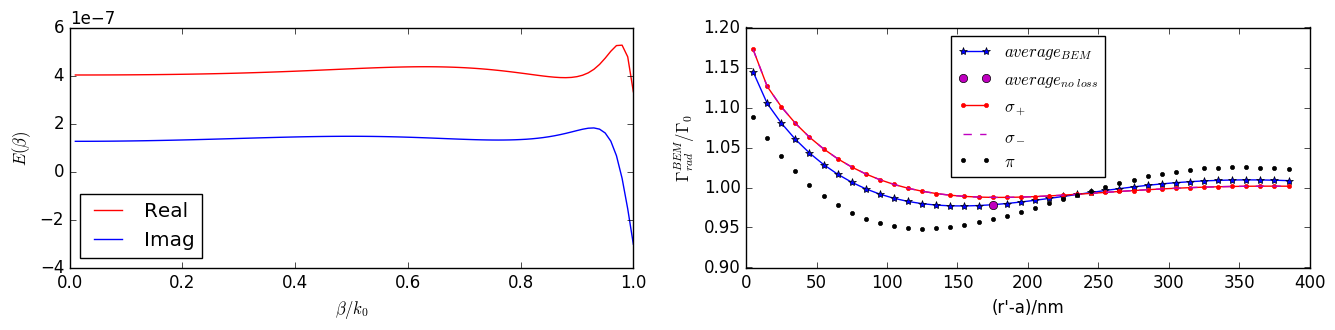

39-element Array{Float64,1}:
 1.14457 
 1.10501 
 1.08049 
 1.0602  
 1.0431  
 1.02868 
 1.01659 
 1.00653 
 0.998294
 0.991665
 0.986471
 0.982553
 0.979768
 ⋮       
 1.00077 
 1.00275 
 1.0045  
 1.00601 
 1.00726 
 1.00824 
 1.00894 
 1.00937 
 1.00953 
 1.00944 
 1.00912 
 1.00857 

In [5]:
# Load data for different dipole positions.
rp_BEM=[230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610];
lenrp=length(rp_BEM);
lendr=146;
a=225;
E_dipolex = readdlm("data/D2/dipolex_E_N_1_lam_852_eps_2.1013_0.001_a_225_x_400_y_0_q_0_1.45_146.dat", header=false);
k_vec=E_dipolex[:,2];
Ex_dx=zeros(Complex{Float64},lendr,lenrp); Ey_dx=zeros(Complex{Float64},lendr,lenrp); Ez_dx=zeros(Complex{Float64},lendr,lenrp);
Ex_dy=zeros(Complex{Float64},lendr,lenrp); Ey_dy=zeros(Complex{Float64},lendr,lenrp); Ez_dy=zeros(Complex{Float64},lendr,lenrp);
Ex_dz=zeros(Complex{Float64},lendr,lenrp); Ey_dz=zeros(Complex{Float64},lendr,lenrp); Ez_dz=zeros(Complex{Float64},lendr,lenrp);
for ii=1:lenrp
    E_dipolex = readdlm("data/D2/dipolex_E_N_1_lam_852_eps_2.1013_0.001_a_225_x_$(rp_BEM[ii])_y_0_q_0_1.45_146.dat", header=false)
    Ex_dx[:,ii]=E_dipolex[:,5]+im*E_dipolex[:,6];
    Ey_dx[:,ii]=E_dipolex[:,7]+im*E_dipolex[:,8];
    Ez_dx[:,ii]=E_dipolex[:,9]+im*E_dipolex[:,10];
    
    E_dipoley = readdlm("data/D2/dipoley_E_N_1_lam_852_eps_2.1013_0.001_a_225_x_$(rp_BEM[ii])_y_0_q_0_1.45_146.dat", header=false)
    Ex_dy[:,ii]=E_dipoley[:,5]+im*E_dipoley[:,6];
    Ey_dy[:,ii]=E_dipoley[:,7]+im*E_dipoley[:,8];
    Ez_dy[:,ii]=E_dipoley[:,9]+im*E_dipoley[:,10];
    
    E_dipolez = readdlm("data/D2/dipolez_E_N_1_lam_852_eps_2.1013_0.001_a_225_x_$(rp_BEM[ii])_y_0_q_0_1.45_146.dat", header=false)
    Ex_dz[:,ii]=E_dipolez[:,5]+im*E_dipolez[:,6];
    Ey_dz[:,ii]=E_dipolez[:,7]+im*E_dipolez[:,8];
    Ez_dz[:,ii]=E_dipolez[:,9]+im*E_dipolez[:,10];
end
# Calculate the diagonal elements of the Green's function tensor from the radiation mode contribution.
c=2.99792458e8;
au=1.72e7; # This is the atomic unit in the CGS-units: $q/a_0^2$ statvolts/cm. In SI units, it becomes $e/(4π\varepsilon_0a_0^2)$ = 5.2e11 V/m.
lambda0=0.852e-6;
ω=2.*pi*c/lambda0;
GFT_rad_ind=zeros(Complex{Float64},3,3,lenrp);
Gxx_rad_ind=zeros(Complex{Float64},lenrp);
Gxy_rad_ind=zeros(Complex{Float64},lenrp);
Gxz_rad_ind=zeros(Complex{Float64},lenrp);
Gyx_rad_ind=zeros(Complex{Float64},lenrp);
Gyy_rad_ind=zeros(Complex{Float64},lenrp);
Gyz_rad_ind=zeros(Complex{Float64},lenrp);
Gzx_rad_ind=zeros(Complex{Float64},lenrp);
Gzy_rad_ind=zeros(Complex{Float64},lenrp);
Gzz_rad_ind=zeros(Complex{Float64},lenrp);
G0=Inf + 2.0/3.*(ω/c)^3*im;
gamma_rad_BEM_rp_average=zeros(lenrp);
gamma_rad_BEM_rp_sigmap=zeros(lenrp);
gamma_rad_BEM_rp_sigmam=zeros(lenrp);
gamma_rad_BEM_rp_pi=zeros(lenrp);
# Define the unitary dipole orientation vector.
e_dipole_sigmap=[-1.;-1.0*im;0]/sqrt(2);
e_dipole_sigmam=[1.; -1.0*im;0]/sqrt(2);
e_dipole_pi=[0.; 0.; 1.];
include("./NumericalIntegration_test.jl") # This is a generalized version of NumericalIntegration package. See: https://github.com/dextorious/NumericalIntegration.jl/pull/7
using NumericalIntegration_test # Replace integrate_test with integrate after the NumericalIntegration package is merged with my Pull Request #7.
breakpoint=100; # This is the index number where the radiative mode cut off out of the k in [0,1]k_0 range.  
for ii=1:lenrp
    Gxx_rad_ind[ii]=integrate_test(k_vec[1:breakpoint],Ex_dx[1:breakpoint,ii],TrapezoidalEven())*(ω/c)^3/pi^2*au*4.0/3.;#G0+
    Gyy_rad_ind[ii]=integrate_test(k_vec[1:breakpoint],Ey_dy[1:breakpoint,ii],TrapezoidalEven())*(ω/c)^3/pi^2*au*4.0/3.;#G0+
    Gzz_rad_ind[ii]=integrate_test(k_vec[1:breakpoint],Ez_dz[1:breakpoint,ii],TrapezoidalEven())*(ω/c)^3/pi^2*au*4.0/3.;#G0+
    Gyx_rad_ind[ii]=integrate_test(k_vec[1:breakpoint],Ey_dx[1:breakpoint,ii],TrapezoidalEven())*(ω/c)^3/pi^2*au*4.0/3.;
    Gzx_rad_ind[ii]=integrate_test(k_vec[1:breakpoint],Ez_dx[1:breakpoint,ii],TrapezoidalEven())*(ω/c)^3/pi^2*au*4.0/3.;
    Gxy_rad_ind[ii]=integrate_test(k_vec[1:breakpoint],Ex_dy[1:breakpoint,ii],TrapezoidalEven())*(ω/c)^3/pi^2*au*4.0/3.;
    Gzy_rad_ind[ii]=integrate_test(k_vec[1:breakpoint],Ez_dy[1:breakpoint,ii],TrapezoidalEven())*(ω/c)^3/pi^2*au*4.0/3.;
    Gxz_rad_ind[ii]=integrate_test(k_vec[1:breakpoint],Ex_dz[1:breakpoint,ii],TrapezoidalEven())*(ω/c)^3/pi^2*au*4.0/3.;
    Gyz_rad_ind[ii]=integrate_test(k_vec[1:breakpoint],Ey_dz[1:breakpoint,ii],TrapezoidalEven())*(ω/c)^3/pi^2*au*4.0/3.;
    GFT_rad_ind[:,:,ii]=[Gxx_rad_ind[ii] Gxy_rad_ind[ii] Gxz_rad_ind[ii];
        Gyx_rad_ind[ii] Gyy_rad_ind[ii] Gzy_rad_ind[ii];
        Gzx_rad_ind[ii] Gzy_rad_ind[ii] Gzz_rad_ind[ii]];
end

# Calculate the relative averaged decay rate at the given dipole located at x=405nm and y=0.
gamma0=imag(G0);
for ii =1:lenrp
    gamma_rad_BEM_rp_average[ii]=1+trace(imag(GFT_rad_ind[:,:,ii]))/gamma0/3.;
    gamma_rad_BEM_rp_sigmap[ii]=1+real((e_dipole_sigmap'*imag(GFT_rad_ind[:,:,ii])*e_dipole_sigmap)/gamma0)[1];
    gamma_rad_BEM_rp_sigmam[ii]=1+real((e_dipole_sigmam'*imag(GFT_rad_ind[:,:,ii])*e_dipole_sigmam)/gamma0)[1];
    gamma_rad_BEM_rp_pi[ii]=1+real((e_dipole_pi'*imag(GFT_rad_ind[:,:,ii])*e_dipole_pi)/gamma0)[1];
end

# Recalculate the diagonal GFT elements with a dipole placed at r'=400nm from the fiber axis with lower imaginary part of epsilon.
E_dipolex = readdlm(join(["data/D2/dipolex_E_N_1_lam_852_eps_2.1013_0.001_a_225_x_","400","_y_0_q_0_1.45_146.dat"]), header=false)
Ex_dx_r0=E_dipolex[:,5]+im*E_dipolex[:,6];
Ey_dx_r0=E_dipolex[:,7]+im*E_dipolex[:,8];
Ez_dx_r0=E_dipolex[:,9]+im*E_dipolex[:,10];
E_dipoley = readdlm(join(["data/D2/dipoley_E_N_1_lam_852_eps_2.1013_0.001_a_225_x_","400","_y_0_q_0_1.45_146.dat"]), header=false)
Ex_dy_r0=E_dipoley[:,5]+im*E_dipoley[:,6];
Ey_dy_r0=E_dipoley[:,7]+im*E_dipoley[:,8];
Ez_dy_r0=E_dipoley[:,9]+im*E_dipoley[:,10];
E_dipolez = readdlm(join(["data/D2/dipolez_E_N_1_lam_852_eps_2.1013_0.001_a_225_x_","400","_y_0_q_0_1.45_146.dat"]), header=false)
Ex_dz_r0=E_dipolez[:,5]+im*E_dipolez[:,6];
Ey_dz_r0=E_dipolez[:,7]+im*E_dipolez[:,8];
Ez_dz_r0=E_dipolez[:,9]+im*E_dipolez[:,10];
Gxx_rad_r0=integrate_test(k_vec[1:breakpoint],Ex_dx_r0[1:breakpoint],TrapezoidalEven())*(ω/c)^3/pi^2*au*4./3.;
Gyy_rad_r0=integrate_test(k_vec[1:breakpoint],Ey_dy_r0[1:breakpoint],TrapezoidalEven())*(ω/c)^3/pi^2*au*4./3.;
Gzz_rad_r0=integrate_test(k_vec[1:breakpoint],Ez_dz_r0[1:breakpoint],TrapezoidalEven())*(ω/c)^3/pi^2*au*4./3.;
gamma_rad_BEM_r0=imag(Gxx_rad_r0+Gyy_rad_r0+Gzz_rad_r0)/3./gamma0;

# Plot out gamma_rad as a function of dipole position.
using PyPlot
figure(figsize=(16,3));
subplot(1,2,1)
plot((1:breakpoint)/100.,real(Ex_dx[1:breakpoint,4]),"r-")
plot((1:breakpoint)/100.,imag(Ex_dx[1:breakpoint,4]),"b-")
ylabel(L"E(\beta)")
xlabel(L"\beta/k_0")
legend(["Real","Imag"],loc="lower left")

subplot(1,2,2)
a=225.;
#plot(rp0_test[1,:]/1.e-9-a, 1+sum(gamma_rad,2), "r-", linewidth=2.0)
plot(rp_BEM-a,real(gamma_rad_BEM_rp_average),"b*-")
plot(400-a,real(gamma_rad_BEM_r0)+1.,"mo");
plot(rp_BEM-a,gamma_rad_BEM_rp_sigmap,"r.-");
plot(rp_BEM-a,gamma_rad_BEM_rp_sigmam,"m--");
plot(rp_BEM-a,gamma_rad_BEM_rp_pi,"k.")
xlabel("(r'-a)/nm")
ylabel(L"\Gamma_{rad}^{BEM}/\Gamma_0")
#ylim([0,1.2])
legend([L"average_{BEM}",L"average_{no\,\,loss}",L"\sigma_+",L"\sigma_-",L"\pi"],loc="upper center",fontsize=12);
#legend([L"average_{BEM}",L"average_{no\,\,loss}",L"\sigma_+",L"\sigma_-",L"\pi"],loc="upper center",fontsize=12);
gamma_rad_BEM_rp_average

On the plots above, the left shows the real and imaginary parts of the induced field component $E_x(r')$ when an $x$-polarized dipole was placed at $r'=405$nm away from the fiber axis. Results are calculated from BEM and are not normalized properly. When the wave number $k\approx k_0=\omega/c$, the values are changing dramatically, despite of a small givin loss to the material. 

The plot on the right-hand-side is the modified decay rates from the non-guided modes calculated in different methods and scenarios. 
The red solid line (using the verified "exact" mode decomposition method) and the blue stars (using the BEM approach) are the averaged decay rates from the non-guided mode contribution part given as
$$\begin{align}
\frac{\Gamma_{rad}}{\Gamma_0} &= 1+ \frac{\sum_{i=x,y,z}\mathrm{Im}\left[\mathbf{e}_i^*\cdot \mathbf{G}_{ind,rad}(\mathbf{r}',\mathbf{r}')\cdot \mathbf{e}_i\right]}{\sum_{i=x,y,z} \mathrm{Im}\left[\mathbf{e}_i^*\cdot \mathbf{G}_0(\mathbf{r}',\mathbf{r}')\cdot \mathbf{e}_i\right]}\\
&=1+ \frac{\sum_{i=x,y,z}\mathrm{Im}\left[\mathbf{e}_i^*\cdot \mathbf{G}_{ind,rad}(\mathbf{r}',\mathbf{r}')\cdot \mathbf{e}_i\right]}{3\mathrm{Im}\left[G_0(\mathbf{r}',\mathbf{r}')\right]}\\
&= 1+ \frac{\mathrm{Tr}\left\{\mathrm{Im}\left[ \mathbf{G}_{ind,rad}(\mathbf{r}',\mathbf{r}')\right]\right\}}{3\mathrm{Im}\left[G_0(\mathbf{r}',\mathbf{r}')\right]}
\end{align}$$
where $\mathbf{G}_0=G_0\mathbb{1}$ with $G_0(\mathbf{r}',\mathbf{r}';\omega)=\frac{2}{3}k_0^3$ is the Green's function in vacuum with $k_0=\frac{\omega}{c}$; and the radiation mode contribution of the induced Green's function tensor in presence of the nanofiber is 
$$ G_{ind,rad}^{ij}(\mathbf{r}',\mathbf{r}')=\frac{2k_0^2*a.u.}{3\pi^2}\int_{-k_0}^{k_0} d\beta E_j^i(\mathbf{r}')=\frac{4k_0^2*a.u.}{3\pi^2}\int_{0}^{k_0} d\beta E_j^i(\mathbf{r}')$$ with $E_j^i(\mathbf{r}')$ representing the $i$ electric field component with an atomic unit dipole polarized along $j$ direction ($i,j=1,y,z$).
Since the the BEM program uses atomic units and CGS-unit system, the prefactor in the formulas above, $a.u.=\frac{q}{a_0^2}=1.72\times 10^7$statvolts/cm, comes from the atomic unit transformation.
Compared to the previous averaged LDOS calculation (red curve), the averaged decay rate (dots) calculated based on the local feild componets with dipoles orientated along three basis directions using the BEM program matches our exact solution pretty well.
The small mismatch when the dipole position becomes far from the fiber surface may be due to the fact that our "exact" decay rate for comparison was actually truncated up to $10$-th order of the non-guided eigen modes of the nanofiber which yields some error for the final result.
From what we have calculated earlier for LDOS, the induced non-guided mode contribution part to the decay rate could be negative at some dipole positions which is correctly reflected at the series of numbers as the last output of the calculation above. 

From the second plot, we also show the non-guided mode induced decay rates that can be coupled to the $\sigma_\pm$ and $\pi$ dipole transitions. 
As you can see, when the atoms are placed around $200$nm from the nanofiber surface, different dipole transitions don't make a noticeable difference which is no longer true for the square waveguide case as shown in another simulation notebook.
In details, we calculate the polarization-dependent decay rates from the non-guided mode contributions by 
$$\begin{align}
\frac{\Gamma_{rad}}{\Gamma_0} &= 1+ \frac{\mathrm{Im}\left[\mathbf{e}_q^*\cdot \mathbf{G}_{ind,rad}(\mathbf{r}',\mathbf{r}')\cdot \mathbf{e}_q\right]}{ \mathrm{Im}\left[\mathbf{e}_q^*\cdot \mathbf{G}_0(\mathbf{r}',\mathbf{r}')\cdot \mathbf{e}_q\right]}
=1+ \frac{\mathrm{Im}\left[\mathbf{e}_q^*\cdot \mathbf{G}_{ind,rad}(\mathbf{r}',\mathbf{r}')\cdot \mathbf{e}_q\right]}{\mathrm{Im}\left[G_0(\mathbf{r}',\mathbf{r}')\right]},
\end{align}$$
where the three orthogonal dipole transition bases
$$\begin{align}
\mathbf{e}_\pm &=\mp \frac{\mathbf{e}_{\tilde{x}}\pm i\mathbf{e}_{\tilde{y}}}{\sqrt{2}}\\
\mathbf{e}_0 &=\mathbf{e}_{\tilde{z}}
\end{align}$$
correspond to the $\sigma_\pm$ and $\pi$ transitions of the atoms.
These basis vectors are quantization-axis dependent, but in our calculation above, we assume the $z$-axis or the waveguide axis is the quantization axis, and hence $\mathbf{e}_{\tilde{x}}=\mathbf{e}_x$, $\mathbf{e}_{\tilde{y}}=\mathbf{e}_y$ and $\mathbf{e}_{\tilde{z}}=\mathbf{e}_z$. 

In [8]:
# Export some variables to a MAT file.
#using HDF5,JLD
#h5open("data/Julia_nanofiber_GFT_decayrates_rad.h5", "w") do h5file
#    g=g_create(h5file, "nanofiber")
#    write(h5file, "nanofiber/rp_BEM", rp_BEM)#, "GFT_rad_ind",GFT_rad_ind)#,"omega",ω,"gamma0",gamma0,"e_dipole_sigmap",e_dipole_sigmap, "e_dipole_sigmam",e_dipole_sigmam,"e_dipole_pi",e_dipole_pi,"gamma_rad_BEM_rp_average",gamma_rad_BEM_rp_average,"gamma_rad_BEM_rp_sigmap",gamma_rad_BEM_rp_sigmap,"gamma_rad_BEM_rp_sigmam",gamma_rad_BEM_rp_sigmam,"gamma_rad_BEM_rp_pi",gamma_rad_BEM_rp_pi,"a",a)
#    write(h5file,"nanofiber/GFT_rad_ind",GFT_rad_ind)
#end
#save("data/Julia_nanofiber_GFT_decayrates_rad.jld","rp_BEM",rp_BEM,"imGFT_rad_ind",imag(GFT_rad_ind),"omega0",ω)
using MAT
matopen("data/D2/Julia_nanofiber_GFT_decayrates_rad_D2.mat", "w") do matfile
    write(matfile,"omega0",ω)
    write(matfile,"rp_BEM",collect(rp_BEM))
    write(matfile,"gamma0",gamma0)
    write(matfile,"e_dipole_sigmap",e_dipole_sigmap)
    write(matfile,"e_dipole_sigmam",e_dipole_sigmam)
    write(matfile,"e_dipole_pi",e_dipole_pi)
    write(matfile,"gamma_rad_BEM_rp_average",gamma_rad_BEM_rp_average)
    write(matfile,"gamma_rad_BEM_rp_sigmap",gamma_rad_BEM_rp_sigmap)
    write(matfile,"gamma_rad_BEM_rp_sigmam",gamma_rad_BEM_rp_sigmam)
    write(matfile,"gamma_rad_BEM_rp_pi",gamma_rad_BEM_rp_pi)
    write(matfile,"a",a)
    write(matfile,"GFT_rad_rp",GFT_rad_ind)
    write(matfile,"Gxx_rad_rp",Gxx_rad_ind)
    write(matfile,"Gxy_rad_rp",Gxy_rad_ind)
    write(matfile,"Gxz_rad_rp",Gxz_rad_ind)
    write(matfile,"Gyx_rad_rp",Gyx_rad_ind)
    write(matfile,"Gyy_rad_rp",Gyy_rad_ind)
    write(matfile,"Gyz_rad_rp",Gyz_rad_ind)
    write(matfile,"Gzx_rad_rp",Gzx_rad_ind)
    write(matfile,"Gzy_rad_rp",Gzy_rad_ind)
    write(matfile,"Gzz_rad_rp",Gzz_rad_ind)
end